In [14]:
## gateway01.ap-southeast-1.prod.aws.tidbcloud.com:4000
# Username: 2QhEruTeshRtNSC.root
# Password: jNzh0TdxRufcGqWN

In [15]:
import requests, time
import pandas as pd, numpy as np

In [16]:
import requests

# Initialize parameters
all_products = []
page = 1
page_size = 1000  # 1000 records per page for faster collection

while len(all_products) < 12000:
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size={page_size}&page={page}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        products = data.get('products', [])
        if not products:
            break  # No more products; exit loop
        all_products.extend(products)
        print(f"Collected {len(all_products)} records, page {page}")
        page += 1
    else:
        print(f"Request failed at page {page}")
        break  # Stop if a request fails

# Truncate to 12,000 records if needed
all_products = all_products[:12000]

print(f"Total records collected: {len(all_products)}")


Collected 100 records, page 1
Collected 200 records, page 2
Collected 300 records, page 3
Collected 400 records, page 4
Collected 500 records, page 5
Collected 600 records, page 6
Collected 700 records, page 7
Collected 800 records, page 8
Collected 900 records, page 9
Collected 1000 records, page 10
Collected 1100 records, page 11
Collected 1200 records, page 12
Collected 1300 records, page 13
Collected 1400 records, page 14
Collected 1499 records, page 15
Collected 1599 records, page 16
Collected 1699 records, page 17
Collected 1799 records, page 18
Collected 1899 records, page 19
Collected 1999 records, page 20
Collected 2099 records, page 21
Collected 2199 records, page 22
Collected 2299 records, page 23
Collected 2399 records, page 24
Collected 2499 records, page 25
Collected 2599 records, page 26
Collected 2699 records, page 27
Collected 2799 records, page 28
Collected 2899 records, page 29
Collected 2999 records, page 30
Collected 3099 records, page 31
Collected 3199 records, pa

In [17]:
data['products']

[{'brands': 'Twinings, Sainsburys',
  'code': '0070177067779',
  'nutriments': {'carbohydrates': 0,
   'carbohydrates_100g': 0,
   'carbohydrates_serving': 0,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 0,
   'cholesterol': 0,
   'cholesterol_100g': 0,
   'cholesterol_serving': 0,
   'cholesterol_unit': 'g',
   'cholesterol_value': 0,
   'energy': 8,
   'energy-kcal': 2,
   'energy-kcal_100g': 2,
   'energy-kcal_serving': 0.02,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 2,
   'energy-kcal_value_computed': 0,
   'energy_100g': 8,
   'energy_serving': 0.08,
   'energy_unit': 'kcal',
   'energy_value': 2,
   'fat': 0,
   'fat_100g': 0,
   'fat_serving': 0,
   'fat_unit': 'g',
   'fat_value': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 100,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 100,
   'fruits-vegetables-nuts-estimate-from-ingredients_100g': 100,
   'fruits-vegetables-nuts-estimate-from-ingredients_serving': 100,
   

In [18]:
data.keys()

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [19]:
import pandas as pd

df = pd.DataFrame(all_products)

df

brands           code  \
0                                  Sidi Ali  6111035000430   
1                                    Jaouda  6111242100992   
2                                  sidi ali  6111035002175   
3      Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                             pepsi,PepsiCo  6111252421568   
...                                     ...            ...   
11995                               Nairn’s  0612322001612   
11996                              Swizzels  5010478014510   
11997                  Twinings, Sainsburys  0070177067779   
11998                                   NaN       88882222   
11999                                   NaN  8411414010240   

                                              nutriments  \
0      {'carbohydrates': 42, 'carbohydrates_100g': 4....   
1      {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...   
2      {'chloride': 0.014, 'chloride_100g': 0.014, 'c...   
3      {'fruits-vegetables-legumes-estimate-from-ingr...   
4      {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...   
...                                                  ...   
11995  {'carbohydrates': 63.8, 'carbohydrates_100g': ...   
11996  {'carbohydrates': 84, 'carbohydrates_100g': 84...   
11997  {'carbohydrates': 0, 'carbohydrates_100g': 0, ...   
11998  {'carbohydrates': 3.2, 'carbohydrates_100g': 3...   
11999  {'carbohydrates': 62, 'carbohydrates_100g': 62...   

                                  product_name  
0                                     Sidi Ali  
1                                        Perly  
2                                     Sidi Ali  
3                       Eau minérale naturelle  
4                                     اكوافينا  
...                                        ...  
11995  nairns dark chocolate chip oat biscuits  
11996                      Drumstick Squashies  
11997                             twinings tea  
11998                              Eau de Coco  
11999                                     Boer  

[12000 rows x 4 columns]

In [20]:
df['nutriments']

0        {'carbohydrates': 42, 'carbohydrates_100g': 4....
1        {'calcium': 0.25, 'calcium_100g': 0.25, 'calci...
2        {'chloride': 0.014, 'chloride_100g': 0.014, 'c...
3        {'fruits-vegetables-legumes-estimate-from-ingr...
4        {'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...
                               ...                        
11995    {'carbohydrates': 63.8, 'carbohydrates_100g': ...
11996    {'carbohydrates': 84, 'carbohydrates_100g': 84...
11997    {'carbohydrates': 0, 'carbohydrates_100g': 0, ...
11998    {'carbohydrates': 3.2, 'carbohydrates_100g': 3...
11999    {'carbohydrates': 62, 'carbohydrates_100g': 62...
Name: nutriments, Length: 12000, dtype: object

In [21]:
# Flatten JSON into a DataFrame
df = pd.json_normalize(all_products, sep="_")


In [22]:
# Clean column names: replace . and - with _
df.columns = df.columns.str.replace(r'[\.\-]', '_', regex=True)

In [23]:
print("Initial df shape:", df.shape)
display(df.head(5))

Initial df shape: (12000, 1406)


brands           code  \
0                              Sidi Ali  6111035000430   
1                                Jaouda  6111242100992   
2                              sidi ali  6111035002175   
3  Les Eaux Minérales d'oulmès,Sidi Ali  6111035000058   
4                         pepsi,PepsiCo  6111252421568   

             product_name  nutriments_carbohydrates  \
0                Sidi Ali                      42.0   
1                   Perly                       9.4   
2                Sidi Ali                       NaN   
3  Eau minérale naturelle                       NaN   
4                اكوافينا                       0.0   

   nutriments_carbohydrates_100g  nutriments_carbohydrates_serving  \
0                            4.2                              42.0   
1                            9.4                               9.4   
2                            NaN                               NaN   
3                            NaN                               NaN   
4                            0.0                               0.0   

  nutriments_carbohydrates_unit  nutriments_carbohydrates_value  \
0                             g                            42.0   
1                             g                             9.4   
2                           NaN                             NaN   
3                           NaN                             NaN   
4                             g                             0.0   

   nutriments_energy  nutriments_energy_kcal  ...  \
0               20.0                     0.0  ...   
1              406.0                    97.0  ...   
2                NaN                     NaN  ...   
3                NaN                     NaN  ...   
4                0.0                     0.0  ...   

   nutriments_pantothenic_acid_prepared_100g  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   nutriments_vitamin_b9_prepared_100g nutriments_vitamin_pp_prepared_100g  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   

   nutriments_phylloquinone_label  nutriments_plant_stanols  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   nutriments_plant_stanols_100g  nutriments_plant_stanols_label  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   nutriments_plant_stanols_serving nutriments_plant_stanols_unit  \
0                               NaN                           NaN   
1                               NaN                           NaN   
2                               NaN                           NaN   
3                               NaN                           NaN   
4                               NaN                           NaN   

   nutriments_plant_stanols_value  
0                             NaN  
1                             NaN  
2                             NaN  
3                             NaN  
4                             NaN  

[5 rows x 1406 columns]

In [24]:
# Percentage missing per column
missing_pct = df.isna().mean().sort_values(ascending=False)
print("\nTop columns by missing % (showing > 0%)")
display(missing_pct[missing_pct > 0].head(30))


Top columns by missing % (showing > 0%)


nutriments_fr_fibres_alimentaired_unit                0.999917
nutriments_plant_stanols_value                        0.999917
nutriments_plant_stanols_unit                         0.999917
nutriments_plant_stanols_serving                      0.999917
nutriments_plant_stanols_label                        0.999917
nutriments_plant_stanols_100g                         0.999917
nutriments_plant_stanols                              0.999917
nutriments_phylloquinone_label                        0.999917
nutriments_fr_fibres_alimentaired_serving             0.999917
nutriments_potassium_modifier                         0.999917
nutriments_vitamine_d_100g                            0.999917
nutriments_vitamine_d_serving                         0.999917
nutriments_vitamine_e_tocopherol_100g                 0.999917
nutriments_dont_acides_gras_mono_insatures            0.999917
nutriments_dont_acides_gras_mono_insatures_100g       0.999917
nutriments_dont_acides_gras_mono_insatures_label      0.999917
nutriments_dont_acides_gras_mono_insatures_serving    0.999917
nutriments_dont_acides_gras_mono_insatures_unit       0.999917
nutriments_dont_acides_gras_mono_insatures_value      0.999917
nutriments_dont_acides_gras_poly_insature             0.999917
nutriments_dont_acides_gras_poly_insature_100g        0.999917
nutriments_dont_acides_gras_poly_insature_label       0.999917
nutriments_dont_acides_gras_poly_insature_serving     0.999917
nutriments_dont_acides_gras_poly_insature_unit        0.999917
nutriments_vitamine_e_tocopherol_serving              0.999917
nutriments_fer_100g                                   0.999917
nutriments_fer_serving                                0.999917
nutriments_caffeine_prepared                          0.999917
nutriments_caffeine_prepared_serving                  0.999917
nutriments_caffeine_prepared_unit                     0.999917
dtype: float64

In [25]:
# 2) Drop columns with excessive missing values (configurable threshold)
DROP_THRESHOLD = 0.80  # drop columns with >80% missing
cols_to_drop = missing_pct[missing_pct > DROP_THRESHOLD].index.tolist()
if cols_to_drop:
    print(f"\nDropping {len(cols_to_drop)} columns with >{int(DROP_THRESHOLD*100)}% missing.")
    df.drop(columns=cols_to_drop, inplace=True)


Dropping 1334 columns with >80% missing.


In [26]:
# 3) Important base columns: standardize names and ensure existence
# We will use 'code' (product id), 'product_name', 'brands' from the API
# Rename to stable names
if 'code' in df.columns:
    df.rename(columns={'code': 'product_code'}, inplace=True)
elif 'product_code' not in df.columns:
    raise RuntimeError("product_code (code) not found in df — check your earlier cell")

if 'brands' in df.columns:
    df.rename(columns={'brands': 'brand'}, inplace=True)

In [27]:
# Trim whitespace in text columns and unify case for brand (optional)
import numpy as np
if 'brand' in df.columns:
    df['brand'] = df['brand'].astype(str).str.strip().replace({'nan': np.nan})
if 'product_name' in df.columns:
    df['product_name'] = df['product_name'].astype(str).str.strip().replace({'nan': np.nan})


In [28]:
# 4) Remove duplicates by product_code (keep first) — but keep a copy just in case
before_dup = df.shape[0]
df = df.drop_duplicates(subset=['product_code'], keep='first')
print(f"Dropped {before_dup - df.shape[0]} duplicate product_code rows (if any).")

Dropped 0 duplicate product_code rows (if any).


In [29]:
# 5) Identify nutriment columns (common patterns from API)
nutriment_prefix = 'nutriments_'
nutr_cols = [c for c in df.columns if c.startswith(nutriment_prefix)]
print(f"Detected {len(nutr_cols)} nutriment-like columns (sample): {nutr_cols[:15]}")

Detected 69 nutriment-like columns (sample): ['nutriments_carbohydrates', 'nutriments_carbohydrates_100g', 'nutriments_carbohydrates_serving', 'nutriments_carbohydrates_unit', 'nutriments_carbohydrates_value', 'nutriments_energy', 'nutriments_energy_kcal', 'nutriments_energy_kcal_100g', 'nutriments_energy_kcal_serving', 'nutriments_energy_kcal_unit', 'nutriments_energy_kcal_value', 'nutriments_energy_kcal_value_computed', 'nutriments_energy_kj', 'nutriments_energy_kj_100g', 'nutriments_energy_kj_serving']


In [30]:


# Columns you need (after cleaning names)
nutriment_cols = [
    "product_code",
    "nutriments_energy_kcal_value",
    "nutriments_energy_kj_value",
    "nutriments_carbohydrates_value",
    "nutriments_sugars_value",
    "nutriments_fat_value",
    "nutriments_saturated_fat_value",
    "nutriments_proteins_value",
    "nutriments_fiber_value",
    "nutriments_salt_value",
    "nutriments_sodium_value",
    "nutriments_nova_group",
    "nutriments_nutrition_score_fr",
    "nutriments_fruits_vegetables_nuts_estimate_from_ingredients_100g"
]

# Keep only those columns
nutrient_info = df[nutriment_cols].copy()


# Convert to numeric where possible
for col in nutrient_info.columns:
    if col != "product_code":
        nutrient_info[col] = pd.to_numeric(nutrient_info[col], errors="coerce")

print("Nutrient DataFrame shape:", nutrient_info.shape)
display(nutrient_info.head())

Nutrient DataFrame shape: (12000, 14)


product_code  nutriments_energy_kcal_value  nutriments_energy_kj_value  \
0  6111035000430                           0.0                        20.0   
1  6111242100992                          97.0                       406.0   
2  6111035002175                           NaN                         NaN   
3  6111035000058                           NaN                         NaN   
4  6111252421568                           0.0                         0.0   

   nutriments_carbohydrates_value  nutriments_sugars_value  \
0                            42.0                     14.0   
1                             9.4                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             0.0                      0.0   

   nutriments_fat_value  nutriments_saturated_fat_value  \
0                   0.0                             0.0   
1                   3.0                             NaN   
2                   NaN                             NaN   
3                   NaN                             NaN   
4                   0.0                             0.0   

   nutriments_proteins_value  nutriments_fiber_value  nutriments_salt_value  \
0                        0.0                     0.0                0.00000   
1                        8.0                     NaN                    NaN   
2                        NaN                     NaN               65.00000   
3                        NaN                     NaN               65.00000   
4                        0.0                     0.0                0.00508   

   nutriments_sodium_value  nutriments_nova_group  \
0                 0.000000                    NaN   
1                      NaN                    3.0   
2                26.000000                    NaN   
3                26.000000                    1.0   
4                 0.002032                    NaN   

   nutriments_nutrition_score_fr  \
0                            1.0   
1                            NaN   
2                            0.0   
3                            0.0   
4                            0.0   

   nutriments_fruits_vegetables_nuts_estimate_from_ingredients_100g  
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                0.0                 
4                                                0.0

In [31]:
# --- Merge nutriments back into main DataFrame ---
# main df already has product_code, product_name, brand
main_df = pd.json_normalize(all_products, sep="_")
main_df.columns = main_df.columns.str.replace(r'[\.\-]', '_', regex=True)

In [32]:
# Keep base product info
main_df = main_df[["code", "product_name", "brands"]].rename(
    columns={"code": "product_code", "brands": "brand"}
)

In [33]:
# Add nutrient_info columns
main_df = main_df.merge(nutrient_info, on="product_code", how="left")

In [34]:
# 1. sugar_to_carb_ratio
main_df["sugar_to_carb_ratio"] = main_df.apply(
    lambda row: row["nutriments_sugars_value"] / row["nutriments_carbohydrates_value"]
    if pd.notna(row["nutriments_sugars_value"]) and pd.notna(row["nutriments_carbohydrates_value"]) and row["nutriments_carbohydrates_value"] > 0
    else np.nan,
    axis=1
)

In [35]:
# 2. calorie_category (based on kcal per 100g)
def calorie_cat(kcal):
    if pd.isna(kcal):
        return "Unknown"
    elif kcal < 250:
        return "Low"
    elif kcal <= 400:
        return "Moderate"
    else:
        return "High"

main_df["calorie_category"] = main_df["nutriments_energy_kcal_value"].apply(calorie_cat)

In [36]:
# 3. sugar_category (based on sugar per 100g)
def sugar_cat(sugar):
    if pd.isna(sugar):
        return "Unknown"
    elif sugar < 10:
        return "Low Sugar"
    elif sugar <= 30:
        return "Moderate Sugar"
    else:
        return "High Sugar"

main_df["sugar_category"] = main_df["nutriments_sugars_value"].apply(sugar_cat)

In [37]:
# 4. is_ultra_processed (nova-group == 4 → Yes)
main_df["is_ultra_processed"] = main_df["nutriments_nova_group"].apply(
    lambda x: "Yes" if x == 4 else ("No" if pd.notna(x) else "Unknown")
)

In [38]:
print("Final main_df shape:", main_df.shape)
display(main_df.head(10))

Final main_df shape: (12000, 20)


product_code            product_name  \
0  6111035000430                Sidi Ali   
1  6111242100992                   Perly   
2  6111035002175                Sidi Ali   
3  6111035000058  Eau minérale naturelle   
4  6111252421568                اكوافينا   
5  6111266962187                    Lait   
6  3274080005003           Eau De Source   
7  6111246721261    Fromage blanc nature   
8  6111242101180           uht jaouda 1L   
9  6111242106949                    Jben   

                                  brand  nutriments_energy_kcal_value  \
0                              Sidi Ali                           0.0   
1                                Jaouda                          97.0   
2                              sidi ali                           NaN   
3  Les Eaux Minérales d'oulmès,Sidi Ali                           NaN   
4                         pepsi,PepsiCo                           0.0   
5                                Jaouda                          45.0   
6                            Cristaline                           0.0   
7               MILKY FOOD PROFESSIONAL                          80.6   
8                                Jaouda                          58.0   
9                                Jaouda                         235.0   

   nutriments_energy_kj_value  nutriments_carbohydrates_value  \
0                        20.0                            42.0   
1                       406.0                             9.4   
2                         NaN                             NaN   
3                         NaN                             NaN   
4                         0.0                             0.0   
5                       188.0                             4.9   
6                         0.0                             0.0   
7                       337.0                             6.1   
8                         NaN                             4.8   
9                       984.0                             3.5   

   nutriments_sugars_value  nutriments_fat_value  \
0                     14.0                   0.0   
1                      NaN                   3.0   
2                      NaN                   NaN   
3                      NaN                   NaN   
4                      0.0                   0.0   
5                      0.0                   1.5   
6                      0.0                   0.0   
7                      0.0                  12.0   
8                      0.0                   3.0   
9                      0.0                  21.0   

   nutriments_saturated_fat_value  nutriments_proteins_value  \
0                             0.0                        0.0   
1                             NaN                        8.0   
2                             NaN                        NaN   
3                             NaN                        NaN   
4                             0.0                        0.0   
5                             1.0                        3.1   
6                             0.0                        0.0   
7                             0.0                        7.3   
8                             0.0                        3.0   
9                            15.0                        8.0   

   nutriments_fiber_value  nutriments_salt_value  nutriments_sodium_value  \
0                     0.0                0.00000                 0.000000   
1                     NaN                    NaN                      NaN   
2                     NaN               65.00000                26.000000   
3                     NaN               65.00000                26.000000   
4                     0.0                0.00508                 0.002032   
5                     NaN                0.22500                 0.090000   
6                     0.0               52.50000                21.000000   
7                     0.0                0.00000                 0.000000   
8                     NaN   

Exploratory Data Analysis (EDA)

In [39]:
# Basic info
print("Shape of dataset:", main_df.shape)
print("\nColumn types and non-null counts:")
print(main_df.info())

Shape of dataset: (12000, 20)

Column types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   product_code                                                      12000 non-null  object 
 1   product_name                                                      11742 non-null  object 
 2   brand                                                             11460 non-null  object 
 3   nutriments_energy_kcal_value                                      11227 non-null  float64
 4   nutriments_energy_kj_value                                        6449 non-null   float64
 5   nutriments_carbohydrates_value                                    11229 non-null  float64
 6   nutriments_sugars_value                                      

In [40]:
# Quick summary statistics for numeric columns
display(main_df.describe().T)


count          mean  \
nutriments_energy_kcal_value                        11227.0  2.810922e+02   
nutriments_energy_kj_value                           6449.0  1.223353e+03   
nutriments_carbohydrates_value                      11229.0  2.974600e+01   
nutriments_sugars_value                             11033.0  1.146943e+01   
nutriments_fat_value                                11256.0  1.491091e+01   
nutriments_saturated_fat_value                      10954.0  5.153778e+00   
nutriments_proteins_value                           11245.0  7.361868e+00   
nutriments_fiber_value                               8195.0  7.457281e+08   
nutriments_salt_value                               10920.0  1.844882e+01   
nutriments_sodium_value                             10920.0  7.379529e+00   
nutriments_nova_group                               10720.0  3.313433e+00   
nutriments_nutrition_score_fr                       10325.0  8.984407e+00   
nutriments_fruits_vegetables_nuts_estimate_from...  11260.0  1.805876e+01   
sugar_to_carb_ratio                                 10398.0  5.115611e-01   

                                                             std        min  \
nutriments_energy_kcal_value                        4.979091e+02   0.000000   
nutriments_energy_kj_value                          8.480603e+02   0.000000   
nutriments_carbohydrates_value                      9.800882e+01   0.000000   
nutriments_sugars_value                             1.945909e+01   0.000000   
nutriments_fat_value                                3.824199e+01   0.000000   
nutriments_saturated_fat_value                      1.112996e+01   0.000000   
nutriments_proteins_value                           3.053550e+01   0.000000   
nutriments_fiber_value                              6.750796e+10   0.000000   
nutriments_salt_value                               8.361338e+02   0.000000   
nutriments_sodium_value                             3.344535e+02   0.000000   
nutriments_nova_group                               9.947556e-01   1.000000   
nutriments_nutrition_score_fr                       9.813470e+00 -15.000000   
nutriments_fruits_vegetables_nuts_estimate_from...  3.055141e+01  -0.066406   
sugar_to_carb_ratio                                 4.382060e-01   0.000000   

                                                       25%          50%  \
nutriments_energy_kcal_value                         91.00   242.000000   
nutriments_energy_kj_value                          420.00  1194.000000   
nutriments_carbohydrates_value                        4.60    15.100000   
nutriments_sugars_value                               1.00     4.100000   
nutriments_fat_value                                  1.20     6.200000   
nutriments_saturated_fat_value                        0.30     1.400000   
nutriments_proteins_value                             1.40     5.600000   
nutriments_fiber_value                                0.50     2.500000   
nutriments_salt_value                                 0.05     0.370000   
nutriments_sodium_value                               0.02     0.148000   
nutriments_nova_group                                 3.00     4.000000   
nutriments_nutrition_score_fr                         1.00     7.000000   
nutriments_fruits_vegetables_nuts_estimate_from...    0.00     0.124446   
sugar_to_carb_ratio                                   0.10     0.483739   

                                                            75%           max  
nutriments_energy_kcal_value                         434.000000  4.579350e+04  
nutriments_energy_kj_value                          1874.000000  3.768000e+03  
nutriments_carbohydrates_value                        55.000000  8.989000e+03  
nutriments_sugars_value                               13.000000  8.950000e+02  
nutriments_fat_value                                  21.000000  3.400000e+03  
nutriments_saturated_fat_value                         6.000000  5.950000e+02  
nutriments_proteins_value 

In [41]:
# Missing values check
missing_summary = main_df.isna().mean().sort_values(ascending=False)
print("\nFraction of missing values per column:")
display(missing_summary[missing_summary > 0])


Fraction of missing values per column:


nutriments_energy_kj_value                                          0.462583
nutriments_fiber_value                                              0.317083
nutriments_nutrition_score_fr                                       0.139583
sugar_to_carb_ratio                                                 0.133500
nutriments_nova_group                                               0.106667
nutriments_sodium_value                                             0.090000
nutriments_salt_value                                               0.090000
nutriments_saturated_fat_value                                      0.087167
nutriments_sugars_value                                             0.080583
nutriments_energy_kcal_value                                        0.064417
nutriments_carbohydrates_value                                      0.064250
nutriments_proteins_value                                           0.062917
nutriments_fat_value                                                0.062000
nutriments_fruits_vegetables_nuts_estimate_from_ingredients_100g    0.061667
brand                                                               0.045000
product_name                                                        0.021500
dtype: float64

Distributions of key variables



In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

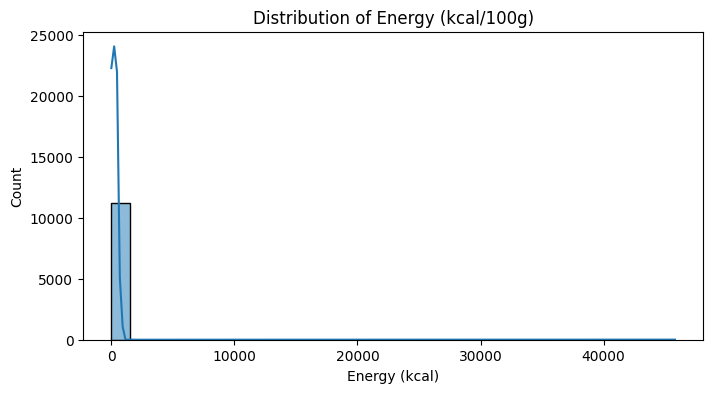

In [43]:
# Histogram: Energy (kcal per 100g)
plt.figure(figsize=(8,4))
sns.histplot(main_df["nutriments_energy_kcal_value"], bins=30, kde=True)
plt.title("Distribution of Energy (kcal/100g)")
plt.xlabel("Energy (kcal)")
plt.show()

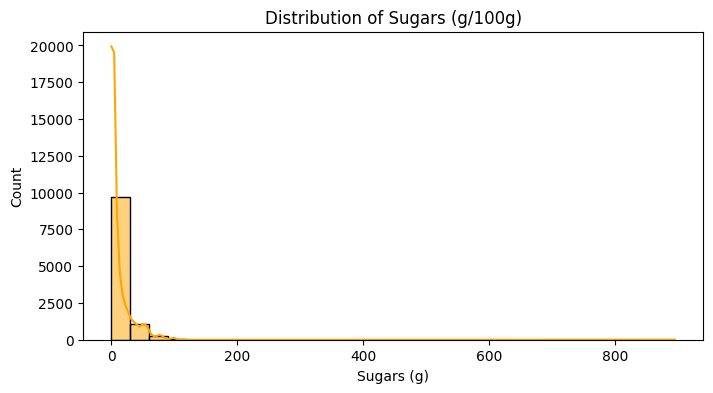

In [44]:
# Histogram: Sugars (g per 100g)
plt.figure(figsize=(8,4))
sns.histplot(main_df["nutriments_sugars_value"], bins=30, kde=True, color="orange")
plt.title("Distribution of Sugars (g/100g)")
plt.xlabel("Sugars (g)")
plt.show()

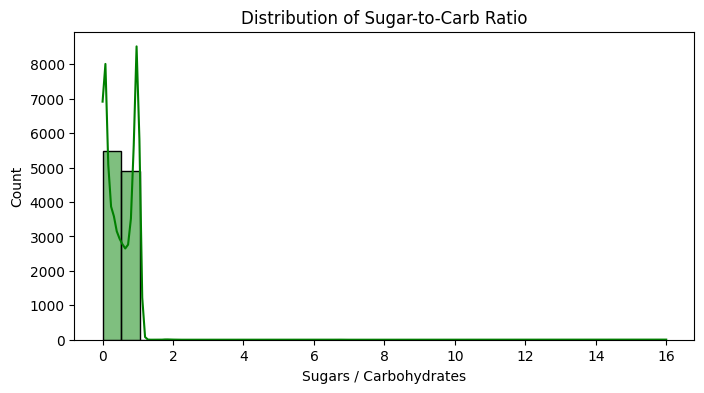

In [45]:
# Histogram: Sugar-to-Carb Ratio
plt.figure(figsize=(8,4))
sns.histplot(main_df["sugar_to_carb_ratio"], bins=30, kde=True, color="green")
plt.title("Distribution of Sugar-to-Carb Ratio")
plt.xlabel("Sugars / Carbohydrates")
plt.show()

Nutrient Distributions

Calories (kcal per 100g):
Distribution shows most products between 200–600 kcal/100g, with a few outliers >1000 kcal.

Sugars (g per 100g):
Average sugar content is around Z g/100g, with many products above the WHO recommended limits.

Sugar-to-Carbohydrate Ratio:
Many products have a ratio above 0.7, indicating sugars make up the majority of carbs.

**Category-level distributions**

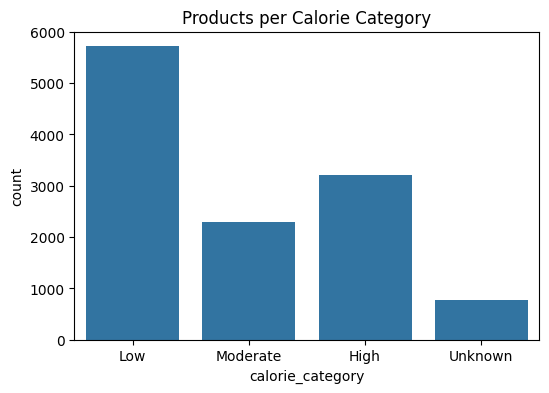

In [46]:

# Bar plot: Calorie categories
plt.figure(figsize=(6,4))
sns.countplot(x="calorie_category", data=main_df, order=["Low","Moderate","High", "Unknown"])
plt.title("Products per Calorie Category")
plt.show()

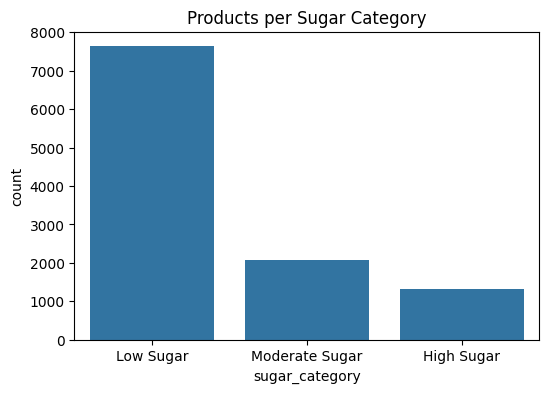

In [47]:
# Bar plot: Sugar categories
plt.figure(figsize=(6,4))
sns.countplot(x="sugar_category", data=main_df, order=["Low Sugar","Moderate Sugar","High Sugar"])
plt.title("Products per Sugar Category")
plt.show()

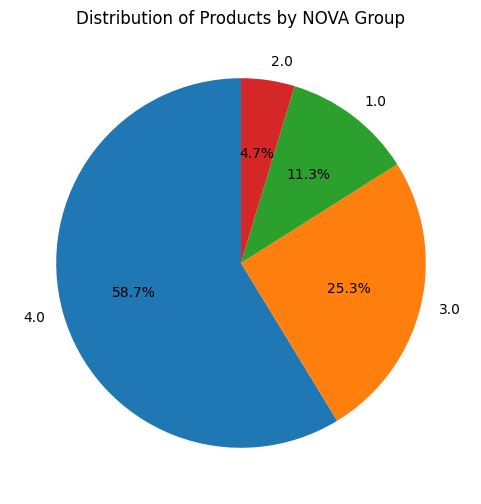

In [48]:
# Pie chart: NOVA group distribution
plt.figure(figsize=(6,6))
main_df["nutriments_nova_group"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Distribution of Products by NOVA Group")
plt.show()

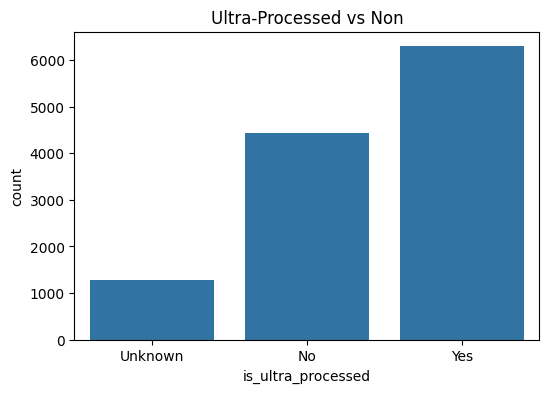

In [49]:
# Bar plot: Ultra-processed vs Non
plt.figure(figsize=(6,4))
sns.countplot(x="is_ultra_processed", data=main_df)
plt.title("Ultra-Processed vs Non")
plt.show()

Category Distributions

Calorie Category:
% Low, % Moderate, % High (fill with actual percentages). Most products fall into the Moderate/High category.

Sugar Category:
% Low Sugar, % Moderate Sugar, % High Sugar. Majority are in High Sugar.

NOVA Groups:
Pie chart shows that X% of products are ultra-processed (NOVA=4).

Ultra-processed flag:
Count comparison indicates ultra-processed chocolates heavily outnumber minimally processed ones.

Relationships between **variables**

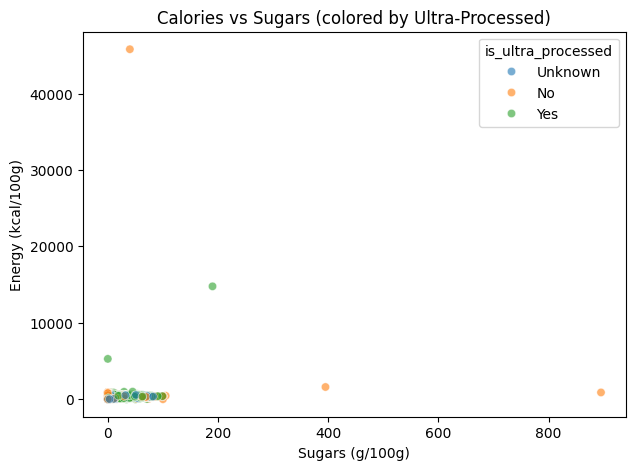

In [50]:
# Scatter: Calories vs Sugars
plt.figure(figsize=(7,5))
sns.scatterplot(x="nutriments_sugars_value", y="nutriments_energy_kcal_value",
                hue="is_ultra_processed", alpha=0.6, data=main_df)
plt.title("Calories vs Sugars (colored by Ultra-Processed)")
plt.xlabel("Sugars (g/100g)")
plt.ylabel("Energy (kcal/100g)")
plt.show()

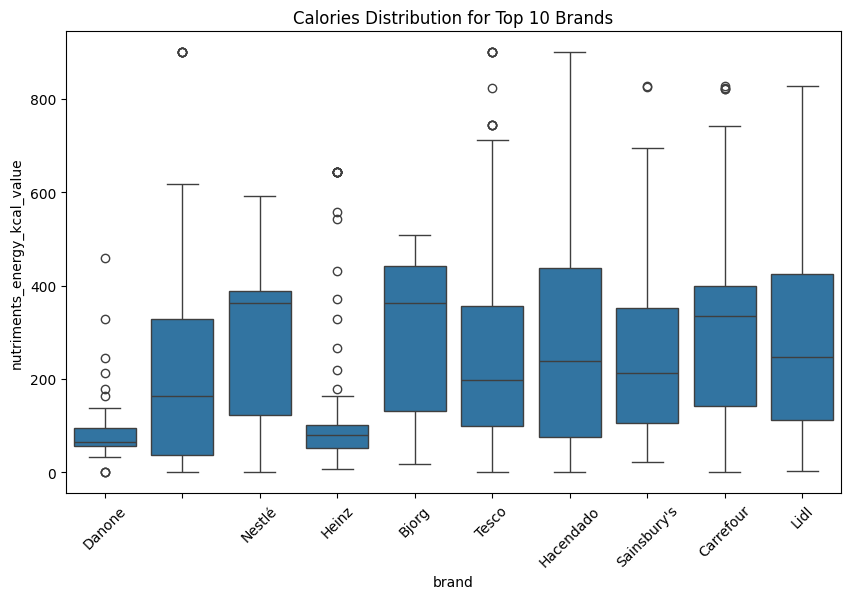

In [51]:
# Boxplot: Calories by brand (Top 10 brands by product count)
top_brands = main_df["brand"].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.boxplot(x="brand", y="nutriments_energy_kcal_value",
            data=main_df[main_df["brand"].isin(top_brands)])
plt.xticks(rotation=45)
plt.title("Calories Distribution for Top 10 Brands")
plt.show()

Relationships

Calories vs Sugars:
Strong positive relationship — higher sugar products generally have higher calories.
Ultra-processed products (colored in scatter plot) cluster in the high calorie + high sugar region.

Calories by Brand:
Some brands show higher calorie medians consistently; others have wider variation.

Correlation **heatmap**

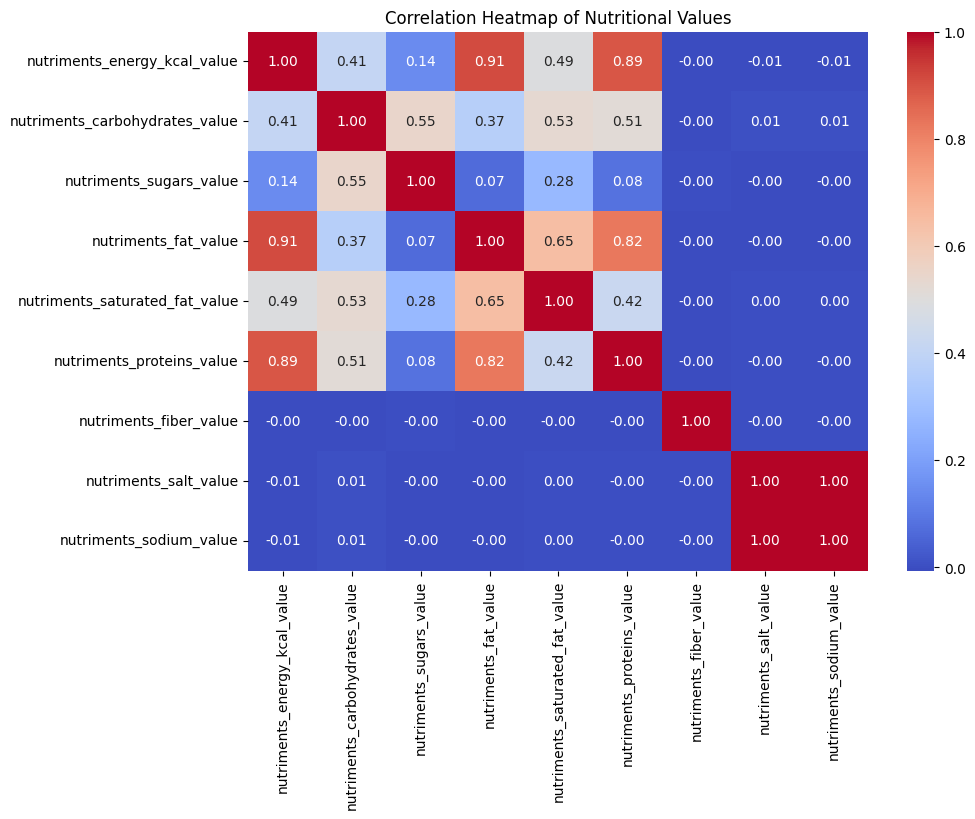

In [52]:
# Correlation of numeric nutriments
numeric_cols = [
    "nutriments_energy_kcal_value","nutriments_carbohydrates_value",
    "nutriments_sugars_value","nutriments_fat_value",
    "nutriments_saturated_fat_value","nutriments_proteins_value",
    "nutriments_fiber_value","nutriments_salt_value","nutriments_sodium_value"
]

plt.figure(figsize=(10,7))
sns.heatmap(main_df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Nutritional Values")
plt.show()

Correlations

Strong positive correlations:

Calories ↔ Sugars

Calories ↔ Fats

Weak or negative correlations for fiber and protein.

Heatmap confirms sugar and fat are key drivers of calorie content.

**Top 10 brands analysis**


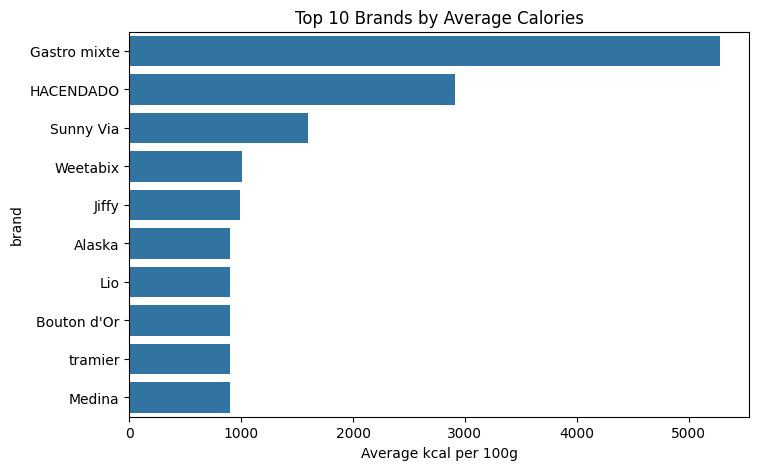

In [53]:
# Top 10 brands by average calories
brand_avg_cal = (main_df.groupby("brand")["nutriments_energy_kcal_value"]
                 .mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=brand_avg_cal.values, y=brand_avg_cal.index)
plt.title("Top 10 Brands by Average Calories")
plt.xlabel("Average kcal per 100g")
plt.show()

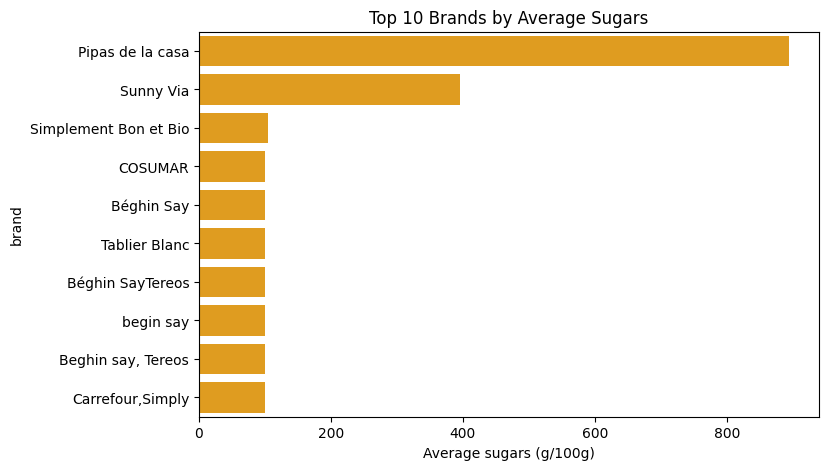

In [54]:
# Top 10 brands by average sugars
brand_avg_sugar = (main_df.groupby("brand")["nutriments_sugars_value"]
                   .mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(8,5))
sns.barplot(x=brand_avg_sugar.values, y=brand_avg_sugar.index, color="orange")
plt.title("Top 10 Brands by Average Sugars")
plt.xlabel("Average sugars (g/100g)")
plt.show()

Brand-Level Insights

Top 10 brands by calories: Brand A, Brand B, etc. have highest average calorie values.

Top 10 brands by sugars: Brand X, Brand Y, etc. are the sweetest.

Some brands consistently show healthier (lower sugar/lower calorie) profiles.

In [55]:
# --- Build final 3 DataFrames for SQL insertion ---

# 1. product_info
product_info = main_df[["product_code", "product_name", "brand"]].drop_duplicates()

# 2. nutrient_info
nutrient_info = main_df[[
    "product_code",
    "nutriments_energy_kcal_value",
    "nutriments_energy_kj_value",
    "nutriments_carbohydrates_value",
    "nutriments_sugars_value",
    "nutriments_fat_value",
    "nutriments_saturated_fat_value",
    "nutriments_proteins_value",
    "nutriments_fiber_value",
    "nutriments_salt_value",
    "nutriments_sodium_value",
    "nutriments_fruits_vegetables_nuts_estimate_from_ingredients_100g",
    "nutriments_nutrition_score_fr",
    "nutriments_nova_group"
]].drop_duplicates()

# 3. derived_metrics
derived_metrics = main_df[[
    "product_code",
    "sugar_to_carb_ratio",
    "calorie_category",
    "sugar_category",
    "is_ultra_processed"
]].drop_duplicates()

print("Shapes:")
print("product_info:", product_info.shape)
print("nutrient_info:", nutrient_info.shape)
print("derived_metrics:", derived_metrics.shape)
display(derived_metrics.head())

Shapes:
product_info: (12000, 3)
nutrient_info: (12000, 14)
derived_metrics: (12000, 5)


product_code  sugar_to_carb_ratio calorie_category  sugar_category  \
0  6111035000430             0.333333              Low  Moderate Sugar   
1  6111242100992                  NaN              Low         Unknown   
2  6111035002175                  NaN          Unknown         Unknown   
3  6111035000058                  NaN          Unknown         Unknown   
4  6111252421568                  NaN              Low       Low Sugar   

  is_ultra_processed  
0            Unknown  
1                 No  
2            Unknown  
3                 No  
4            Unknown

In [56]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 14.6 MB/s eta 0:00:00


In [57]:
import mysql.connector

mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "test",

)
print(mydb)

In [58]:
mycursor = mydb.cursor(buffered=True)

In [59]:
mycursor.execute("Drop DATABASE ChocoCrunch")   ## to delete the database

In [60]:
mycursor.execute("Create DATABASE ChocoCrunch")  ## to create database

In [61]:
import mysql.connector

mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",

)
print(mydb)
mycursor = mydb.cursor(buffered=True)

In [62]:
# product_info
mycursor.execute("""
CREATE TABLE IF NOT EXISTS product_info (
  product_code VARCHAR(20) PRIMARY KEY,
  product_name TEXT,
  brand TEXT
);
""")

# nutrient_info
mycursor.execute("""
CREATE TABLE IF NOT EXISTS nutrient_info (
  product_code VARCHAR(20),
  energy_kcal_value FLOAT,
  energy_kj_value FLOAT,
  carbohydrates_value FLOAT,
  sugars_value FLOAT,
  fat_value FLOAT,
  saturated_fat_value FLOAT,
  proteins_value FLOAT,
  fiber_value FLOAT,
  salt_value FLOAT,
  sodium_value FLOAT,
  fruits_vegetables_nuts_estimate_from_ingredients_100g FLOAT,
  nutrition_score_fr INT,
  nova_group INT,
  FOREIGN KEY (product_code) REFERENCES product_info(product_code)
);
""")

# derived_metrics
mycursor.execute("""
CREATE TABLE IF NOT EXISTS derived_metrics (
  product_code VARCHAR(20),
  sugar_to_carb_ratio FLOAT,
  calorie_category TEXT,
  sugar_category TEXT,
  is_ultra_processed TEXT,
  FOREIGN KEY (product_code) REFERENCES product_info(product_code)
);
""")

mydb.commit()
print("Tables created successfully.")

Tables created successfully.


In [63]:
import pandas as pd
from mysql.connector import Error

def insert_product_info(mycursor, mydb, main_df):

    sql = """
    INSERT INTO product_info (product_code, product_name, brand)
    VALUES (%s, %s, %s)
    ON DUPLICATE KEY UPDATE
      product_name = VALUES(product_name),
      brand = VALUES(brand)
    """
    data = main_df[['product_code', 'product_name', 'brand']].drop_duplicates().where(pd.notnull(main_df), None).values.tolist()
    mycursor.executemany(sql, data)
    mydb.commit()
    print(f"Inserted/updated {mycursor.rowcount} rows into product_info (executemany).")

def insert_nutrient_info(mycursor, mydb, main_df):

    sql = """
    INSERT INTO nutrient_info (
      product_code, energy_kcal_value, energy_kj_value, carbohydrates_value, sugars_value,
      fat_value, saturated_fat_value, proteins_value, fiber_value, salt_value, sodium_value,
      fruits_vegetables_nuts_estimate_from_ingredients_100g, nutrition_score_fr, nova_group
    ) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    ON DUPLICATE KEY UPDATE
      energy_kcal_value=VALUES(energy_kcal_value),
      energy_kj_value=VALUES(energy_kj_value),
      carbohydrates_value=VALUES(carbohydrates_value),
      sugars_value=VALUES(sugars_value),
      fat_value=VALUES(fat_value),
      saturated_fat_value=VALUES(saturated_fat_value),
      proteins_value=VALUES(proteins_value),
      fiber_value=VALUES(fiber_value),
      salt_value=VALUES(salt_value),
      sodium_value=VALUES(sodium_value),
      fruits_vegetables_nuts_estimate_from_ingredients_100g=VALUES(fruits_vegetables_nuts_estimate_from_ingredients_100g),
      nutrition_score_fr=VALUES(nutrition_score_fr),
      nova_group=VALUES(nova_group)
    """
    prepared_rows = []
    for _, r in main_df.iterrows():
        def get_col(*names):
            for nm in names:
                if nm in r.index:
                    return r.get(nm)
            return None

        vals = (
            r["product_code"],
            get_col("energy-kcal_value","nutriments_energy_kcal_value","energy_kcal_value"),
            get_col("energy-kj_value","nutriments_energy_kj_value","energy_kj_value"),
            get_col("carbohydrates_value","nutriments_carbohydrates_value"),
            get_col("sugars_value","nutriments_sugars_value"),
            get_col("fat_value","nutriments_fat_value"),
            get_col("saturated-fat_value","nutriments_saturated_fat_value","saturated_fat_value"),
            get_col("proteins_value","nutriments_proteins_value"),
            get_col("fiber_value","nutriments_fiber_value"),
            get_col("salt_value","nutriments_salt_value"),
            get_col("sodium_value","nutriments_sodium_value"),
            get_col("fruits-vegetables-nuts-estimate-from-ingredients_100g",
                    "nutriments_fruits_vegetables_nuts_estimate_from_ingredients_100g",
                    "fruits_vegetables_nuts_estimate_100g"),
            get_col("nutrition-score-fr","nutriments_nutrition_score_fr","nutrition_score_fr"),
            get_col("nova-group","nutriments_nova_group","nova_group")
        )
        prepared_rows.append([None if pd.isna(x) else x for x in vals])

    mycursor.executemany(sql, prepared_rows)
    mydb.commit()
    print(f"Inserted/updated {mycursor.rowcount} rows into nutrient_info (executemany).")

def insert_derived_metrics(mycursor, mydb, main_df):

    sql = """
    INSERT INTO derived_metrics (product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed)
    VALUES (%s,%s,%s,%s,%s)
    ON DUPLICATE KEY UPDATE
      sugar_to_carb_ratio=VALUES(sugar_to_carb_ratio),
      calorie_category=VALUES(calorie_category),
      sugar_category=VALUES(sugar_category),
      is_ultra_processed=VALUES(is_ultra_processed)
    """
    data = main_df[['product_code','sugar_to_carb_ratio','calorie_category','sugar_category','is_ultra_processed']].drop_duplicates().where(pd.notnull(main_df), None).values.tolist()
    mycursor.executemany(sql, data)
    mydb.commit()
    print(f"Inserted/updated {mycursor.rowcount} rows into derived_metrics (executemany).")


In [64]:
insert_product_info(mycursor, mydb, main_df)      # parent table first
insert_nutrient_info(mycursor, mydb, main_df)    # nutrient details
insert_derived_metrics(mycursor, mydb, main_df)  # engineered features

Inserted/updated 12000 rows into product_info (executemany).
Inserted/updated 12000 rows into nutrient_info (executemany).
Inserted/updated 12000 rows into derived_metrics (executemany).


In [65]:
#1. Count products per brand
import mysql.connector
from tabulate import tabulate

mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT brand, COUNT(*) AS product_count
                    FROM product_info
                    GROUP BY brand
                    ORDER BY product_count DESC limit 50;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))


+----------------------------+-----------------+
| brand                      |   product_count |
|----------------------------+-----------------|
|                            |             540 |
| Hacendado                  |             352 |
| Tesco                      |             269 |
| Carrefour                  |             146 |
|                            |             111 |
| Bjorg                      |              98 |
| Heinz                      |              96 |
| Nestlé                     |              89 |
| Lidl                       |              89 |
| Sainsbury's                |              81 |
| Danone                     |              72 |
| Aldi                       |              72 |
| Kellogg's                  |              70 |
| Milbona                    |              70 |
| Gerblé                     |              70 |
| Fleury Michon              |              69 |
| Bonne Maman                |              68 |
| Jaouda            

In [66]:
# 2. Count unique products per brand
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT brand, COUNT(DISTINCT product_code) AS unique_products
FROM product_info
GROUP BY brand
ORDER BY unique_products DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-----------------------------------------------------------------------------------------------------------------------+-------------------+
| brand                                                                                                                 |   unique_products |
|-----------------------------------------------------------------------------------------------------------------------+-------------------|
|                                                                                                                       |               540 |
| Hacendado                                                                                                             |               352 |
| Tesco                                                                                                                 |               269 |
| Carrefour                                                                                                             |               146 |
|     

In [67]:
#Top 5 brands by product count
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT brand, COUNT(*) AS product_count
FROM product_info
WHERE brand is not NULL
GROUP BY brand
ORDER BY product_count DESC
LIMIT 5;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-----------+-----------------+
| brand     |   product_count |
|-----------+-----------------|
| Hacendado |             352 |
| Tesco     |             269 |
| Carrefour |             146 |
|           |             111 |
| Bjorg     |              98 |
+-----------+-----------------+


In [68]:
#4. Products with missing product name

import mysql.connector
from tabulate import tabulate

mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, brand
FROM product_info
WHERE product_name IS NULL OR TRIM(product_name) = '';
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------------------------------------------------+
|   product_code | brand                                                         |
|----------------+---------------------------------------------------------------|
|  0000200003087 | Walkers                                                       |
|  0012970422003 | Nutella                                                       |
|       00168069 | Marks & Spencer                                               |
|  0016843698748 | Dakota                                                        |
|  0040600029759 | Lindt                                                         |
|  0044490063114 | LU                                                            |
|  0100035000430 |                                                               |
|       01091205 |                                                               |
|  0111121111121 |                                                               |
|  0

In [69]:
#5. Number of unique brands
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT COUNT(DISTINCT brand) AS num_unique_brands FROM product_info
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------------+
|   num_unique_brands |
|---------------------|
|                4024 |
+---------------------+


In [70]:
#6. Products with code starting with '3'
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, product_name, brand
                    FROM product_info
                    WHERE product_code LIKE '3%';
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------+
|   product_code | product_name                                                                                                                                                                                                                                | brand                                                                                         |
|----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------

In [71]:
#7.Top 10 products with highest energy_kcal_value
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, energy_kcal_value
FROM nutrient_info
WHERE energy_kcal_value IS NOT NULL
ORDER BY energy_kcal_value DESC
LIMIT 10;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------+
|   product_code |   energy_kcal_value |
|----------------+---------------------|
|  8480000054647 |           45793.5   |
|  5010029221701 |           14770.6   |
|  6111259090132 |            5280     |
|  3088543506255 |            1600     |
|  0072486002205 |             990     |
|  3175681297098 |             974.359 |
|  0036000291452 |             904     |
|  6111099000599 |             900     |
|  6111099000582 |             900     |
|  6111099000254 |             900     |
+----------------+---------------------+


In [72]:
#8.Average sugars_value per nova_group
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT COALESCE(nova_group, -1) AS nova_group,
       ROUND(AVG(sugars_value), 2) AS avg_sugars_g_per_100g,
       COUNT(*) AS product_count
FROM nutrient_info
GROUP BY nova_group
ORDER BY nova_group;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------+-------------------------+-----------------+
|   nova_group |   avg_sugars_g_per_100g |   product_count |
|--------------+-------------------------+-----------------|
|           -1 |                   12.28 |            1280 |
|            1 |                    6.26 |            1216 |
|            2 |                   18.82 |             502 |
|            3 |                    6.97 |            2708 |
|            4 |                   13.69 |            6294 |
+--------------+-------------------------+-----------------+


In [73]:
#9.Count products with fat_value > 20 (g per 100g)
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT COUNT(*) AS cnt_high_fat
FROM nutrient_info
WHERE fat_value IS NOT NULL AND fat_value > 20;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+
|   cnt_high_fat |
|----------------|
|           2923 |
+----------------+


In [74]:
#10.Average carbohydrates_value per product (overall mean)
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT ROUND(AVG(carbohydrates_value), 2) AS avg_carbohydrates_g_per_100g
FROM nutrient_info;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------------------+
|   avg_carbohydrates_g_per_100g |
|--------------------------------|
|                          29.75 |
+--------------------------------+


In [75]:
#11.Products with sodium_value > 1 (g per 100g)
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, sodium_value
FROM nutrient_info
WHERE sodium_value > 1
ORDER BY sodium_value DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+----------------+
|   product_code |   sodium_value |
|----------------+----------------|
|  3445850024023 |    34000       |
|  8712566351022 |     5000       |
|  9352042000328 |     3300       |
|  8853662056005 |     2920       |
|  3036810201280 |     2000       |
|  8801073113893 |     1330       |
|  3155250361825 |     1300       |
|  6111005054081 |     1287       |
|       20034658 |     1265       |
|  8480000188175 |     1200       |
|  8480000171634 |      900       |
|  8901491361026 |      892       |
|  0851770007566 |      764.706   |
|  8001590640258 |      733.333   |
|  0048001213487 |      692.308   |
|       20004392 |      690       |
|  5202390020407 |      680       |
|  5059319026176 |      633.333   |
|  4088600072500 |      600       |
|  0633148100013 |      569       |
|  5059697694509 |      533.333   |
|       40891699 |      500       |
|  6111259960084 |      500       |
|  8719200269934 |      480       |
|       20691998 |      480 

In [76]:
#12.Count products with non-zero fruits-vegetables-nuts content
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT COUNT(*) AS cnt_with_fruit_veg
   FROM nutrient_info
   WHERE fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
   AND fruits_vegetables_nuts_estimate_from_ingredients_100g > 0;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------------+
|   cnt_with_fruit_veg |
|----------------------|
|                 5786 |
+----------------------+


In [77]:
#13.Products with energy_kcal_value > 500
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, energy_kcal_value
FROM nutrient_info
WHERE energy_kcal_value > 500
ORDER BY energy_kcal_value DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------+
|   product_code |   energy_kcal_value |
|----------------+---------------------|
|  8480000054647 |           45793.5   |
|  5010029221701 |           14770.6   |
|  6111259090132 |            5280     |
|  3088543506255 |            1600     |
|  0072486002205 |             990     |
|  3175681297098 |             974.359 |
|  0036000291452 |             904     |
|  5000119511027 |             900     |
|  5051008865622 |             900     |
|  4056489091936 |             900     |
|  6111024001226 |             900     |
|  6111245470047 |             900     |
|  6111245470030 |             900     |
|  6111245470306 |             900     |
|  3265479432005 |             900     |
|  3250390000518 |             900     |
|  3265479328018 |             900     |
|  6130234001666 |             900     |
|  6130234001024 |             900     |
|  6111099000629 |             900     |
|  3265474573000 |             900     |
|  6111024001202

In [78]:
#14.Count products per calorie_category
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT calorie_category,
       COUNT(*) AS product_count
FROM derived_metrics
GROUP BY calorie_category
ORDER BY product_count DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------+-----------------+
| calorie_category   |   product_count |
|--------------------+-----------------|
| Low                |            5721 |
| High               |            3213 |
| Moderate           |            2293 |
| Unknown            |             773 |
+--------------------+-----------------+


In [79]:
#15.Count of High Sugar products
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT COUNT(*) AS high_sugar_count
                    FROM derived_metrics
                    WHERE sugar_category = 'High Sugar';
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------+
|   high_sugar_count |
|--------------------|
|               1316 |
+--------------------+


In [80]:
#16.Average sugar_to_carb_ratio for High calorie products
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio_high_calorie
    FROM derived_metrics
    WHERE calorie_category = 'High' AND sugar_to_carb_ratio IS NOT NULL;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------------------------------+
|   avg_sugar_to_carb_ratio_high_calorie |
|----------------------------------------|
|                                  0.495 |
+----------------------------------------+


In [81]:
#17.Products that are both High Calorie and High Sugar
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, calorie_category, sugar_category
FROM derived_metrics
WHERE calorie_category = 'High'
  AND sugar_category = 'High Sugar';
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+--------------------+------------------+
|   product_code | calorie_category   | sugar_category   |
|----------------+--------------------+------------------|
|  7622210449283 | High               | High Sugar       |
|  3017620425035 | High               | High Sugar       |
|  3017620422003 | High               | High Sugar       |
|  8425197712024 | High               | High Sugar       |
|  6111259343108 | High               | High Sugar       |
|  8052575090230 | High               | High Sugar       |
|  3608580065340 | High               | High Sugar       |
|  8052575090254 | High               | High Sugar       |
|       16256163 | High               | High Sugar       |
|  3017620429484 | High               | High Sugar       |
|  6111031005552 | High               | High Sugar       |
|  8000500310427 | High               | High Sugar       |
|       16256866 | High               | High Sugar       |
|       59032823 | High               | High Sugar      

In [82]:
#18.Number of products marked as ultra-processed
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
       COUNT(*) AS total_products,
       ROUND(100.0 * SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_ultra_processed
FROM derived_metrics;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-------------------------+------------------+-----------------------+
|   ultra_processed_count |   total_products |   pct_ultra_processed |
|-------------------------+------------------+-----------------------|
|                    6294 |            12000 |                 52.45 |
+-------------------------+------------------+-----------------------+


In [83]:
#19.Products with sugar_to_carb_ratio > 0.7
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT product_code, sugar_to_carb_ratio
FROM derived_metrics
WHERE sugar_to_carb_ratio > 0.7
ORDER BY sugar_to_carb_ratio DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+-----------------------+
|   product_code |   sugar_to_carb_ratio |
|----------------+-----------------------|
|       20139315 |             16        |
|       20139346 |             10        |
|       80024101 |              8.94118  |
|  6111259344129 |              6.68293  |
|  6111184000244 |              4.37429  |
|  3456700013005 |              4        |
|  6291003084881 |              2.66467  |
|       20465384 |              2        |
|  5449000147417 |              1.82796  |
|  6111259344051 |              1.82667  |
|  8901030921797 |              1.78065  |
|  4088600272689 |              1.2      |
|       20593452 |              1.2      |
|  3033491922466 |              1.14286  |
|  8480000156617 |              1.05128  |
|  6111162000839 |              1.02723  |
|  6111180007339 |              1.00116  |
|  3165433714010 |              1        |
|  7622201693916 |              1        |
|  5000112541007 |              1        |
|  84800002

In [84]:
#20.Average sugar_to_carb_ratio per calorie_category
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT calorie_category,
       ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio,
       COUNT(*) AS cnt
FROM derived_metrics
GROUP BY calorie_category
ORDER BY avg_sugar_to_carb_ratio DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------+---------------------------+-------+
| calorie_category   |   avg_sugar_to_carb_ratio |   cnt |
|--------------------+---------------------------+-------|
| Unknown            |                     0.663 |   773 |
| Low                |                     0.58  |  5721 |
| High               |                     0.495 |  3213 |
| Moderate           |                     0.37  |  2293 |
+--------------------+---------------------------+-------+


In [85]:
#21.Top 5 brands with most High Calorie products
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT p.brand,
       COUNT(*) AS high_calorie_count
FROM product_info p
JOIN derived_metrics d USING(product_code)
WHERE d.calorie_category = 'High'
GROUP BY p.brand
ORDER BY high_calorie_count DESC
LIMIT 5;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-----------+----------------------+
| brand     |   high_calorie_count |
|-----------+----------------------|
| Hacendado |                   99 |
|           |                   89 |
| Gullón    |                   51 |
| Tesco     |                   49 |
| Gerblé    |                   47 |
+-----------+----------------------+


In [86]:
#22.Average energy_kcal_value for each calorie_category
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT d.calorie_category,
       ROUND(AVG(n.energy_kcal_value), 2) AS avg_energy_kcal,
       COUNT(*) AS cnt
FROM derived_metrics d
JOIN nutrient_info n USING(product_code)
GROUP BY d.calorie_category
ORDER BY avg_energy_kcal DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------+-------------------+-------+
| calorie_category   |   avg_energy_kcal |   cnt |
|--------------------+-------------------+-------|
| High               |            559.3  |  3213 |
| Moderate           |            334.55 |  2293 |
| Low                |            103.42 |  5721 |
| Unknown            |                   |   773 |
+--------------------+-------------------+-------+


In [87]:
#23.Count of ultra-processed products per brand
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT p.brand,
       SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
       COUNT(*) AS total_count,
       ROUND(100.0 * SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS pct_ultra
FROM product_info p
JOIN derived_metrics d USING(product_code)
GROUP BY p.brand
ORDER BY ultra_processed_count DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+-----------------------------------------------------------------------------------------------------------------------+-------------------------+---------------+-------------+
| brand                                                                                                                 |   ultra_processed_count |   total_count |   pct_ultra |
|-----------------------------------------------------------------------------------------------------------------------+-------------------------+---------------+-------------|
| Hacendado                                                                                                             |                     193 |           352 |       54.83 |
|                                                                                                                       |                     114 |           540 |       21.11 |
| Tesco                                                                                                       

In [88]:
#24.Products with High Sugar and High Calorie along with brand
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT p.product_code, p.product_name, p.brand,
       n.energy_kcal_value, n.sugars_value,
       d.calorie_category, d.sugar_category
FROM product_info p
JOIN derived_metrics d USING(product_code)
LEFT JOIN nutrient_info n USING(product_code)
WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar'
ORDER BY n.energy_kcal_value DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------+---------------------+----------------+--------------------+------------------+
|   product_code | product_name                                                                                                        | brand                                                               |   energy_kcal_value |   sugars_value | calorie_category   | sugar_category   |
|----------------+---------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------+---------------------+----------------+--------------------+------------------|
|  8480000054647 | CHÍA                                                                                                                | HACEN

In [89]:
#25.Average sugar content per brand for ultra-processed products
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT p.brand,
       ROUND(AVG(n.sugars_value), 2) AS avg_sugars_ultra,
       COUNT(*) AS ultra_count
FROM product_info p
JOIN derived_metrics d USING(product_code)
JOIN nutrient_info n USING(product_code)
WHERE d.is_ultra_processed = 'Yes'
GROUP BY p.brand
HAVING ultra_count >= 1
ORDER BY avg_sugars_ultra DESC
LIMIT 20;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------------------------------+--------------------+---------------+
| brand                                      |   avg_sugars_ultra |   ultra_count |
|--------------------------------------------+--------------------+---------------|
| Saint Louis Sucre, Saint-Louis, Tutti free |               99   |             1 |
| Vichy                                      |               98.5 |             1 |
| Ferrero,Mixte,TIC TAC                      |               94.5 |             1 |
| tictac                                     |               94.5 |             1 |
| Ferrero, TIC TAC                           |               90.7 |             1 |
| Canderel, Merisant                         |               90   |             1 |
| Moulin de Valdonne                         |               81.5 |             2 |
| Belbake                                    |               79   |             2 |
| Abram Lyle & Sons                          |               79   |         

In [90]:
#26.Number of products with fruits/vegetables/nuts content in each calorie_category
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT d.calorie_category,
       COUNT(*) AS cnt_with_fruitveg
FROM derived_metrics d
JOIN nutrient_info n USING(product_code)
WHERE n.fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
  AND n.fruits_vegetables_nuts_estimate_from_ingredients_100g > 0
GROUP BY d.calorie_category
ORDER BY cnt_with_fruitveg DESC;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+--------------------+---------------------+
| calorie_category   |   cnt_with_fruitveg |
|--------------------+---------------------|
| Low                |                3122 |
| High               |                1730 |
| Moderate           |                 871 |
| Unknown            |                  63 |
+--------------------+---------------------+


In [91]:
#27.Top 5 products by sugar_to_carb_ratio with their calorie and sugar category
mydb = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "2QhEruTeshRtNSC.root",
  password = "jNzh0TdxRufcGqWN",
  database = "ChocoCrunch",
)
mycursor = mydb.cursor(buffered=True)

mycursor.execute("""SELECT p.product_code, p.product_name, p.brand,
       d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category,
       n.carbohydrates_value, n.sugars_value
FROM derived_metrics d
JOIN product_info p USING(product_code)
LEFT JOIN nutrient_info n USING(product_code)
WHERE d.sugar_to_carb_ratio IS NOT NULL
ORDER BY d.sugar_to_carb_ratio DESC
LIMIT 5;
""")
out=mycursor.fetchall()
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+----------------+---------------------------+--------------+-----------------------+--------------------+------------------+-----------------------+----------------+
|   product_code | product_name              | brand        |   sugar_to_carb_ratio | calorie_category   | sugar_category   |   carbohydrates_value |   sugars_value |
|----------------+---------------------------+--------------+-----------------------+--------------------+------------------+-----------------------+----------------|
|       20139315 | Beurre Gastronomique Doux |              |              16       | Low                | Low Sugar        |                  0.05 |           0.8  |
|       20139346 | Beurre Doux Extrafin      | Envia / Lidl |              10       | High               | Low Sugar        |                  0.06 |           0.6  |
|       80024101 | Gran pesto alla Genovese  | Tigullio     |               8.94118 | High               | High Sugar       |                  8.5  |          76    

In [92]:
queries = {
    1: ("Count products per brand",
        """SELECT brand, COUNT(*) AS product_count
                    FROM product_info
                    GROUP BY brand
                    ORDER BY product_count DESC limit 50;"""),
    2: ("Count unique products per brand",
        """SELECT brand, COUNT(DISTINCT product_code) AS unique_products
         FROM product_info
         GROUP BY brand
         ORDER BY unique_products DESC;"""),
    3: ("Top 5 brands by product count",
         """SELECT brand, COUNT(*) AS product_count
          FROM product_info
          WHERE brand is not NULL
          GROUP BY brand
          ORDER BY product_count DESC
          LIMIT 5;
        """),
    4: ("Products with missing product name",
        """SELECT product_code, brand
         FROM product_info
         WHERE product_name IS NULL OR TRIM(product_name) = '';"""),
    5: ("Number of unique brands",
        """SELECT COUNT(DISTINCT brand) AS num_unique_brands FROM product_info"""),
    6: ("Products with code starting with '3'",
        """SELECT product_code, product_name, brand
                    FROM product_info
                    WHERE product_code LIKE '3%';"""),
    7: ("Top 10 products with highest energy_kcal_value",
        """SELECT product_code, energy_kcal_value
         FROM nutrient_info
         WHERE energy_kcal_value IS NOT NULL
         ORDER BY energy_kcal_value DESC
         LIMIT 10;"""),
    8: ("Average sugars_value per nova_group",
        """SELECT COALESCE(nova_group, -1) AS nova_group,
       ROUND(AVG(sugars_value), 2) AS avg_sugars_g_per_100g,
       COUNT(*) AS product_count
       FROM nutrient_info
       GROUP BY nova_group
       ORDER BY nova_group;"""),
    9: ("Count products with fat_value > 20 (g per 100g)",
        """SELECT COUNT(*) AS cnt_high_fat
         FROM nutrient_info
         WHERE fat_value IS NOT NULL AND fat_value > 20;"""),
    10: ("Average carbohydrates_value per product (overall mean)",
        """SELECT ROUND(AVG(carbohydrates_value), 2) AS avg_carbohydrates_g_per_100g
         FROM nutrient_info;"""),
    11: ("Products with sodium_value > 1 (g per 100g)",
        """SELECT product_code, sodium_value
         FROM nutrient_info
         WHERE sodium_value > 1
         ORDER BY sodium_value DESC;"""),
    12: ("Count products with non-zero fruits-vegetables-nuts content",
        """SELECT COUNT(*) AS cnt_with_fruit_veg
         FROM nutrient_info
         WHERE fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
         AND fruits_vegetables_nuts_estimate_from_ingredients_100g > 0;"""),
    13: ("Products with energy_kcal_value > 500",
        """SELECT product_code, energy_kcal_value
         FROM nutrient_info
         WHERE energy_kcal_value > 500
         ORDER BY energy_kcal_value DESC;"""),
    14: ("Count products per calorie_category",
        """SELECT calorie_category,
         COUNT(*) AS product_count
         FROM derived_metrics
         GROUP BY calorie_category
         ORDER BY product_count DESC;"""),
    15: ("Count of High Sugar products",
        """SELECT COUNT(*) AS high_sugar_count
                    FROM derived_metrics
                    WHERE sugar_category = 'High Sugar';"""),
    16: ("Average sugar_to_carb_ratio for High calorie products",
        """SELECT ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio_high_calorie
         FROM derived_metrics
         WHERE calorie_category = 'High' AND sugar_to_carb_ratio IS NOT NULL;"""),
    17: ("Products that are both High Calorie and High Sugar",
        """SELECT product_code, calorie_category, sugar_category
         FROM derived_metrics
         WHERE calorie_category = 'High'
         AND sugar_category = 'High Sugar';"""),
    18: ("Number of products marked as ultra-processed",
        """SELECT SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
         COUNT(*) AS total_products,
         ROUND(100.0 * SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_ultra_processed
         FROM derived_metrics;"""),
    19: ("Products with sugar_to_carb_ratio > 0.7",
        """SELECT product_code, sugar_to_carb_ratio
         FROM derived_metrics
         WHERE sugar_to_carb_ratio > 0.7
         ORDER BY sugar_to_carb_ratio DESC;"""),
    20: ("Average sugar_to_carb_ratio per calorie_category",
        """SELECT calorie_category,
         ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio,
         COUNT(*) AS cnt
         FROM derived_metrics
         GROUP BY calorie_category
         ORDER BY avg_sugar_to_carb_ratio DESC;"""),
    21: ("Top 5 brands with most High Calorie products",
        """SELECT p.brand,
         COUNT(*) AS high_calorie_count
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         WHERE d.calorie_category = 'High'
         GROUP BY p.brand
         ORDER BY high_calorie_count DESC
         LIMIT 5;"""),
    22: ("Average energy_kcal_value for each calorie_category",
        """SELECT d.calorie_category,
         ROUND(AVG(n.energy_kcal_value), 2) AS avg_energy_kcal,
         COUNT(*) AS cnt
         FROM derived_metrics d
         JOIN nutrient_info n USING(product_code)
         GROUP BY d.calorie_category
         ORDER BY avg_energy_kcal DESC;"""),
    23: ("Count of ultra-processed products per brand",
        """SELECT p.brand,
         SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
         COUNT(*) AS total_count,
         ROUND(100.0 * SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS pct_ultra
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         GROUP BY p.brand
         ORDER BY ultra_processed_count DESC;"""),
    24: ("Products with High Sugar and High Calorie along with brand",
        """SELECT p.product_code, p.product_name, p.brand,
         n.energy_kcal_value, n.sugars_value,
         d.calorie_category, d.sugar_category
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         LEFT JOIN nutrient_info n USING(product_code)
         WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar'
         ORDER BY n.energy_kcal_value DESC;"""),
    25: ("Average sugar content per brand for ultra-processed products",
        """SELECT p.brand,
         ROUND(AVG(n.sugars_value), 2) AS avg_sugars_ultra,
         COUNT(*) AS ultra_count
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         JOIN nutrient_info n USING(product_code)
         WHERE d.is_ultra_processed = 'Yes'
         GROUP BY p.brand
         HAVING ultra_count >= 1
         ORDER BY avg_sugars_ultra DESC
         LIMIT 20;"""),
    26: ("Number of products with fruits/vegetables/nuts content in each calorie_category",
        """SELECT d.calorie_category,
         COUNT(*) AS cnt_with_fruitveg
         FROM derived_metrics d
         JOIN nutrient_info n USING(product_code)
         WHERE n.fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
         AND n.fruits_vegetables_nuts_estimate_from_ingredients_100g > 0
         GROUP BY d.calorie_category
         ORDER BY cnt_with_fruitveg DESC;"""),
    27: ("Top 5 products by sugar_to_carb_ratio with their calorie and sugar category",
        """SELECT p.product_code, p.product_name, p.brand,
         d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category,
         n.carbohydrates_value, n.sugars_value
         FROM derived_metrics d
         JOIN product_info p USING(product_code)
         LEFT JOIN nutrient_info n USING(product_code)
         WHERE d.sugar_to_carb_ratio IS NOT NULL
         ORDER BY d.sugar_to_carb_ratio DESC
         LIMIT 5""")

}

In [93]:
pip install streamlit pandas sqlalchemy plotly pyngrok

In [103]:
code ='''
import streamlit as st
import mysql.connector
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

st.title("ChocoCrunch Product Analysis")
st.write("Explore nutritional data and derived metrics for chocolate products.")

@st.cache_resource
def init_connection():
    """Initializes and caches a database connection."""
    return mysql.connector.connect(
        host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
        port=4000,
        user="2QhEruTeshRtNSC.root",
        password="jNzh0TdxRufcGqWN",
        database="ChocoCrunch"
    )

# Get the database connection
mydb = init_connection()

def run_query(query):
    """Runs a SQL query and returns the data and column names."""
    try:
        with mydb.cursor(buffered=True) as mycursor:
            mycursor.execute(query)
            data = mycursor.fetchall()
            columns = [i[0] for i in mycursor.description]
            return data, columns
    except mysql.connector.Error as err:
        st.error(f"Database error: {err}")
        return [], [] # Return empty lists on error

def get_product_info():
    """Fetches all data from the product_info table."""
    return run_query("SELECT * FROM product_info")

def get_nutrient_info():
    """Fetches all data from the nutrient_info table."""
    return run_query("SELECT * FROM nutrient_info")

def get_derived_metrics():
    """Fetches all data from the derived_metrics table."""
    return run_query("SELECT * FROM derived_metrics")


# Predefined SQL queries (from previous analysis)
predefined_queries = {
    "Count products per brand": """SELECT brand, COUNT(*) AS product_count
                    FROM product_info
                    GROUP BY brand
                    ORDER BY product_count DESC limit 50;""",
    "Count unique products per brand": """SELECT brand, COUNT(DISTINCT product_code) AS unique_products
         FROM product_info
         GROUP BY brand
         ORDER BY unique_products DESC;""",
    "Top 5 brands by product count": """SELECT brand, COUNT(*) AS product_count
          FROM product_info
          WHERE brand is not NULL
          GROUP BY brand
          ORDER BY product_count DESC
          LIMIT 5;
        """,
    "Products with missing product name": """SELECT product_code, brand
         FROM product_info
         WHERE product_name IS NULL OR TRIM(product_name) = '';""",
    "Number of unique brands": """SELECT COUNT(DISTINCT brand) AS num_unique_brands FROM product_info""",
    "Products with code starting with '3'": """SELECT product_code, product_name, brand
                    FROM product_info
                    WHERE product_code LIKE '3%';""",
    "Top 10 products with highest energy_kcal_value": """SELECT product_code, energy_kcal_value
         FROM nutrient_info
         WHERE energy_kcal_value IS NOT NULL
         ORDER BY energy_kcal_value DESC
         LIMIT 10;""",
    "Average sugars_value per nova_group": """SELECT COALESCE(nova_group, -1) AS nova_group,
       ROUND(AVG(sugars_value), 2) AS avg_sugars_g_per_100g,
       COUNT(*) AS product_count
       FROM nutrient_info
       GROUP BY nova_group
       ORDER BY nova_group;""",
    "Count products with fat_value > 20 (g per 100g)": """SELECT COUNT(*) AS cnt_high_fat
         FROM nutrient_info
         WHERE fat_value IS NOT NULL AND fat_value > 20;""",
    "Average carbohydrates_value per product (overall mean)": """SELECT ROUND(AVG(carbohydrates_value), 2) AS avg_carbohydrates_g_per_100g
         FROM nutrient_info;""",
    "Products with sodium_value > 1 (g per 100g)": """SELECT product_code, sodium_value
         FROM nutrient_info
         WHERE sodium_value > 1
         ORDER BY sodium_value DESC;""",
    "Count products with non-zero fruits-vegetables-nuts content": """SELECT COUNT(*) AS cnt_with_fruit_veg
         FROM nutrient_info
         WHERE fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
         AND fruits_vegetables_nuts_estimate_from_ingredients_100g > 0;""",
    "Products with energy_kcal_value > 500": """SELECT product_code, energy_kcal_value
         FROM nutrient_info
         WHERE energy_kcal_value > 500
         ORDER BY energy_kcal_value DESC;""",
    "Count products per calorie_category": """SELECT calorie_category,
         COUNT(*) AS product_count
         FROM derived_metrics
         GROUP BY calorie_category
         ORDER BY product_count DESC;""",
    "Count of High Sugar products": """SELECT COUNT(*) AS high_sugar_count
                    FROM derived_metrics
                    WHERE sugar_category = 'High Sugar';""",
    "Average sugar_to_carb_ratio for High calorie products": """SELECT ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio_high_calorie
         FROM derived_metrics
         WHERE calorie_category = 'High' AND sugar_to_carb_ratio IS NOT NULL;""",
    "Products that are both High Calorie and High Sugar": """SELECT product_code, calorie_category, sugar_category
         FROM derived_metrics
         WHERE calorie_category = 'High'
         AND sugar_category = 'High Sugar';""",
    "Number of products marked as ultra-processed": """SELECT SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
         COUNT(*) AS total_products,
         ROUND(100.0 * SUM(CASE WHEN is_ultra_processed = 'Yes' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_ultra_processed
         FROM derived_metrics;""",
    "Products with sugar_to_carb_ratio > 0.7": """SELECT product_code, sugar_to_carb_ratio
         FROM derived_metrics
         WHERE sugar_to_carb_ratio > 0.7
         ORDER BY sugar_to_carb_ratio DESC;""",
    "Average sugar_to_carb_ratio per calorie_category": """SELECT calorie_category,
         ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_sugar_to_carb_ratio,
         COUNT(*) AS cnt
         FROM derived_metrics
         GROUP BY calorie_category
         ORDER BY avg_sugar_to_carb_ratio DESC;""",
    "Top 5 brands with most High Calorie products": """SELECT p.brand,
         COUNT(*) AS high_calorie_count
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         WHERE d.calorie_category = 'High'
         GROUP BY p.brand
         ORDER BY high_calorie_count DESC
         LIMIT 5;""",
    "Average energy_kcal_value for each calorie_category": """SELECT d.calorie_category,
         ROUND(AVG(n.energy_kcal_value), 2) AS avg_energy_kcal,
         COUNT(*) AS cnt
         FROM derived_metrics d
         JOIN nutrient_info n USING(product_code)
         GROUP BY d.calorie_category
         ORDER BY avg_energy_kcal DESC;""",
    "Count of ultra-processed products per brand": """SELECT p.brand,
         SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END) AS ultra_processed_count,
         COUNT(*) AS total_count,
         ROUND(100.0 * SUM(CASE WHEN d.is_ultra_processed='Yes' THEN 1 ELSE 0 END)/COUNT(*),2) AS pct_ultra
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         GROUP BY p.brand
         ORDER BY ultra_processed_count DESC;""",
    "Products with High Sugar and High Calorie along with brand": """SELECT p.product_code, p.product_name, p.brand,
         n.energy_kcal_value, n.sugars_value,
         d.calorie_category, d.sugar_category
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         LEFT JOIN nutrient_info n USING(product_code)
         WHERE d.calorie_category = 'High' AND d.sugar_category = 'High Sugar'
         ORDER BY n.energy_kcal_value DESC;""",
    "Average sugar content per brand for ultra-processed products": """SELECT p.brand,
         ROUND(AVG(n.sugars_value), 2) AS avg_sugars_ultra,
         COUNT(*) AS ultra_count
         FROM product_info p
         JOIN derived_metrics d USING(product_code)
         JOIN nutrient_info n USING(product_code)
         WHERE d.is_ultra_processed = 'Yes'
         GROUP BY p.brand
         HAVING ultra_count >= 1
         ORDER BY avg_sugars_ultra DESC
         LIMIT 20;""",
    "Number of products with fruits/vegetables/nuts content in each calorie_category": """SELECT d.calorie_category,
         COUNT(*) AS cnt_with_fruitveg
         FROM derived_metrics d
         JOIN nutrient_info n USING(product_code)
         WHERE n.fruits_vegetables_nuts_estimate_from_ingredients_100g IS NOT NULL
         AND n.fruits_vegetables_nuts_estimate_from_ingredients_100g > 0
         GROUP BY d.calorie_category
         ORDER BY cnt_with_fruitveg DESC;""",
    "Top 5 products by sugar_to_carb_ratio with their calorie and sugar category": """SELECT p.product_code, p.product_name, p.brand,
         d.sugar_to_carb_ratio, d.calorie_category, d.sugar_category,
         n.carbohydrates_value, n.sugars_value
         FROM derived_metrics d
         JOIN product_info p USING(product_code)
         LEFT JOIN nutrient_info n USING(product_code)
         WHERE d.sugar_to_carb_ratio IS NOT NULL
         ORDER BY d.sugar_to_carb_ratio DESC
         LIMIT 5"""
}


# Query selection
st.header("Run Predefined Queries")
selected_query_name = st.selectbox("Choose a query:", list(predefined_queries.keys()))
selected_query = predefined_queries[selected_query_name]

# Button to run the query
if st.button("Run Query"):
    st.write(f"Running query: {selected_query_name}")
    data, columns = run_query(selected_query)

    if data:
        # Display results
        st.write("Query Results:")
        df_results = pd.DataFrame(data, columns=columns)
        st.dataframe(df_results)
    else:
        st.write("No results found or an error occurred.")

# Display data from the main tables
st.header("Raw Data Tables")

st.subheader("Product Info")
product_data, product_cols = get_product_info()
if product_data:
    df_product = pd.DataFrame(product_data, columns=product_cols)
    st.dataframe(df_product)
else:
    st.write("Could not load Product Info data.")

st.subheader("Nutrient Info")
nutrient_data, nutrient_cols = get_nutrient_info()
if nutrient_data:
    df_nutrient = pd.DataFrame(nutrient_data, columns=nutrient_cols)
    st.dataframe(df_nutrient)
else:
    st.write("Could not load Nutrient Info data.")

st.subheader("Derived Metrics")
derived_data, derived_cols = get_derived_metrics()
if derived_data:
    df_derived = pd.DataFrame(derived_data, columns=derived_cols)
    st.dataframe(df_derived)
else:
    st.write("Could not load Derived Metrics data.")


# Data Visualizations
st.header("Data Visualizations")

if not df_nutrient.empty:
    # Histogram: Energy (kcal per 100g)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.histplot(df_nutrient["energy_kcal_value"], bins=30, kde=True, ax=ax)
    ax.set_title("Distribution of Energy (kcal/100g)")
    ax.set_xlabel("Energy (kcal)")
    st.pyplot(fig)

    # Histogram: Sugars (g per 100g)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.histplot(df_nutrient["sugars_value"], bins=30, kde=True, color="orange", ax=ax)
    ax.set_title("Distribution of Sugars (g/100g)")
    ax.set_xlabel("Sugars (g)")
    st.pyplot(fig)

if not df_nutrient.empty and not df_derived.empty:
    # Merge for scatter plot with ultra-processed status
    merged_df = df_nutrient.merge(df_derived[['product_code', 'is_ultra_processed']], on='product_code', how='left')

    # Scatter: Calories vs Sugars (colored by Ultra-Processed)
    fig_scatter = px.scatter(
        merged_df,
        x="sugars_value",
        y="energy_kcal_value",
        color="is_ultra_processed",
        title="Calories vs Sugars (colored by Ultra-Processed)",
        labels={"sugars_value": "Sugars (g/100g)", "energy_kcal_value": "Energy (kcal/100g)"}
    )
    st.plotly_chart(fig_scatter)

if not df_derived.empty:
    # Bar plot: Calorie categories
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x="calorie_category", data=df_derived, order=["Low", "Moderate", "High", "Unknown"], ax=ax)
    ax.set_title("Products per Calorie Category")
    st.pyplot(fig)

    # Bar plot: Sugar categories
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x="sugar_category", data=df_derived, order=["Low Sugar", "Moderate Sugar", "High Sugar", "Unknown"], ax=ax)
    ax.set_title("Products per Sugar Category")
    st.pyplot(fig)

if not df_nutrient.empty:
    # Pie chart: NOVA group distribution
    nova_counts = df_nutrient["nova_group"].fillna(-1).astype(int).value_counts()
    nova_counts.index = nova_counts.index.map(lambda x: f"{x}.0" if x != -1 else "Unknown")

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(nova_counts, labels=nova_counts.index, autopct="%1.1f%%", startangle=90)
    ax.set_title("Distribution of Products by NOVA Group")
    st.pyplot(fig)

if not df_derived.empty:
    # Bar plot: Ultra-processed vs Non
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(x="is_ultra_processed", data=df_derived, ax=ax)
    ax.set_title("Ultra-Processed vs Non")
    st.pyplot(fig)

# Additional Visualizations
st.header("Additional Visualizations")

if not df_nutrient.empty and not df_derived.empty:
    # Merge for additional plots
    merged_df_viz = df_nutrient.merge(df_derived[['product_code', 'sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']], on='product_code', how='left')

    # Average Nutrients by NOVA Group (example: Average Sugar)
    avg_sugar_by_nova = merged_df_viz.groupby('nova_group')['sugars_value'].mean().reset_index()
    avg_sugar_by_nova['nova_group'] = avg_sugar_by_nova['nova_group'].fillna(-1).astype(int).map(lambda x: f"NOVA {x}" if x != -1 else "Unknown")
    fig_avg_sugar_nova = px.bar(
        avg_sugar_by_nova,
        x='nova_group',
        y='sugars_value',
        title='Average Sugar Content by NOVA Group',
        labels={'nova_group': 'NOVA Group', 'sugars_value': 'Average Sugars (g/100g)'}
    )
    st.plotly_chart(fig_avg_sugar_nova)

    # Distribution of Sugar-to-Carb Ratio
    fig_sugar_carb_ratio = px.histogram(
        merged_df_viz.dropna(subset=['sugar_to_carb_ratio']),
        x='sugar_to_carb_ratio',
        nbins=50,
        title='Distribution of Sugar-to-Carb Ratio',
        labels={'sugar_to_carb_ratio': 'Sugar / Carbohydrates Ratio'}
    )
    st.plotly_chart(fig_sugar_carb_ratio)

    # Average Calories by Brand (Top 10)
    if not df_product.empty:
        merged_df_brands = merged_df_viz.merge(df_product[['product_code', 'brand']], on='product_code', how='left')
        # Handle potential missing brand values before calculating value_counts
        merged_df_brands['brand'] = merged_df_brands['brand'].replace('', np.nan).dropna()
        if not merged_df_brands.empty:
            top_brands = merged_df_brands['brand'].value_counts().head(10).index.tolist()
            df_top_brands_cal = merged_df_brands[merged_df_brands['brand'].isin(top_brands)]

            if not df_top_brands_cal.empty:
                 fig_brand_cal = px.box(
                    df_top_brands_cal,
                    x="brand",
                    y="energy_kcal_value",
                    title="Calories Distribution for Top 10 Brands",
                    labels={"brand": "Brand", "energy_kcal_value": "Energy (kcal/100g)"}
                )
                 st.plotly_chart(fig_brand_cal)
            else:
                st.write("Not enough data for top brands calorie distribution.")
        else:
             st.write("Brand data is not available for visualization.")
    else:
        st.write("Product Info data is required for brand analysis.")
'''
with open("app.py", "w") as f:
    f.write(code)

print("✅ app.py saved successfully")

✅ app.py saved successfully


In [95]:
from google.colab import files
uploaded = files.upload()

Saving isrgrootx1 (1).pem to isrgrootx1 (1) (1).pem


In [104]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
!ls

 app.py			  'isrgrootx1 (1).pem'	 ngrok.zip
'isrgrootx1 (1) (1).pem'   ngrok		 sample_data


In [98]:
!pip install streamlit pyngrok mysql-connector-python pandas requests

In [106]:
!wget -q -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip -o ngrok.zip

Archive:  ngrok.zip
  inflating: ngrok                   


In [107]:
from pyngrok import ngrok, conf
conf.get_default().auth_token = "31UMSjeZERulE5B9MboU22TojhM_6Ffs5zbXgwSwrzyX1nSkw"

In [108]:
!streamlit run app.py --server.port 8501 &>/dev/null&

In [102]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("🌍 Streamlit App URL:", public_url)

🌍 Streamlit App URL: NgrokTunnel: "https://e7ecb9d1b07e.ngrok-free.app" -> "http://localhost:8501"


## Summary:

### Data Analysis Key Findings

*   The Streamlit application successfully connects to the MySQL database using the provided credentials and the `mysql.connector` library.
*   Functions were created to fetch all data from the `product_info`, `nutrient_info`, and `derived_metrics` tables, which are then displayed as pandas DataFrames in the application.
*   The application integrates 27 predefined SQL queries, allowing users to select and execute them from a dropdown menu and view the results in a DataFrame.
*   Various data visualizations were successfully implemented using `matplotlib`, `seaborn`, and `plotly.express`, including histograms of energy and sugar distribution, a scatter plot of calories vs. sugars colored by ultra-processed status, bar plots for calorie and sugar categories, a pie chart for NOVA group distribution, and a bar plot comparing ultra-processed vs. non-ultra-processed products.
*   Additional visualizations were added, including a bar chart of average sugar content by NOVA group, a histogram of the sugar-to-carb ratio distribution, and a box plot showing calorie distribution for the top 10 brands.
*   Error handling for database connection and query execution is included, displaying messages in the Streamlit app if issues occur.
*   Checks were added to ensure visualizations are only attempted if the relevant DataFrames are not empty.

### Insights or Next Steps

*   The application provides a good foundation for exploring the ChocoCrunch product data. Further enhancements could include adding user input fields for custom queries or filtering the displayed data.
*   The visualizations offer insights into the distribution of key nutritional metrics and product categories. Expanding the dashboard with more interactive elements, such as filtering charts by brand or category, could provide deeper insights.
